# KC Analysis

1. Reg data import/cleaning
2. Month, Season x ROI
3. Statistical Significance with ANOVA
4. Runtime
5. Distributions
6. Stats by Movie Budget - Month/Season
7. Popularity/ROI

## Reg data import/cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_palette("mako")

#import sqlite3
#conn = sqlite3.connect(‘.db’)
#cursor = conn.cursor()

In [5]:
df = pd.read_csv('final.csv')

#drop dupes
df.drop_duplicates(subset = 'title', keep = 'first', inplace = True)

In [3]:
df = df.dropna(subset = ['genre'])

In [4]:
df['genre'].isna().sum()

0

In [5]:
df.shape

(2385, 15)

In [6]:
#initial
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2454
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2385 non-null   int64  
 1   title              2385 non-null   object 
 2   runtime            1997 non-null   float64
 3   primary_name       2137 non-null   object 
 4   studio             1183 non-null   object 
 5   popularity         1913 non-null   float64
 6   vote_average       1913 non-null   float64
 7   vote_count         1913 non-null   float64
 8   release_date       2385 non-null   object 
 9   production_budget  2385 non-null   float64
 10  worldwide_gross    2385 non-null   float64
 11  month              2385 non-null   float64
 12  year               2385 non-null   float64
 13  roi                2385 non-null   float64
 14  genre              2385 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 298.1+ KB


In [104]:
df = df[df['title'] != 'Twilight']
df.head()

,Unnamed: 0,title,runtime,primary_name,studio,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,month,year,roi,genre
0,19,Foodfight!,91.0,Lawrence Kasanoff,NaN,4.705,2.1,46.0,"Dec 31, 2012",45000000.0,73706.0,12.0,2012.0,-0.998362,Comedy Animation Action Family
1,32,Mortal Kombat,NaN,Simon McQuoid,NaN,NaN,NaN,NaN,"Aug 18, 1995",20000000.0,122133227.0,8.0,1995.0,5.106661,Fantasy Adventure Action
2,39,The Overnight,88.0,Jed I. Goodman,NaN,6.576,6.0,200.0,"Jun 19, 2015",200000.0,1165996.0,6.0,2015.0,4.829980,Comedy Mystery
3,49,On the Road,124.0,Walter Salles,IFC,8.919,5.6,518.0,"Mar 22, 2013",25000000.0,9313302.0,3.0,2013.0,-0.627468,Drama Romance Adventure
4,61,The Secret Life of Walter Mitty,114.0,Ben Stiller,Fox,10.743,7.1,4859.0,"Dec 25, 2013",91000000.0,187861183.0,12.0,2013.0,1.064409,Comedy Drama Fantasy Adventure


## Month x ROI

In [8]:
#create subset
month = df[['title', 'roi','month']]
month.head()

,title,roi,month
0,Foodfight!,-0.998362,12.0
1,Mortal Kombat,5.106661,8.0
2,The Overnight,4.829980,6.0
3,On the Road,-0.627468,3.0
4,The Secret Life of Walter Mitty,1.064409,12.0


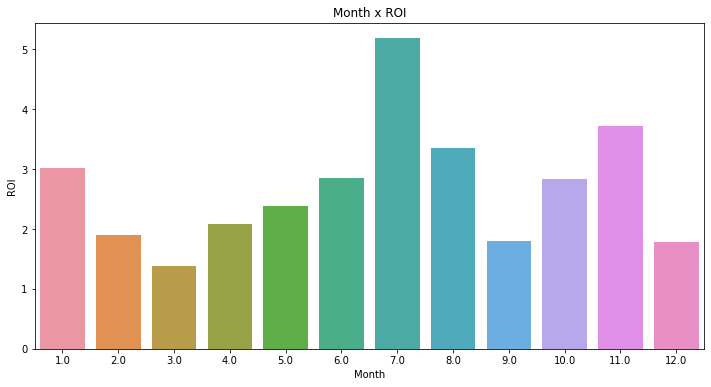

In [9]:
sns.set_palette("mako")

mako = sns.color_palette("mako")

#plot
plt.figure(figsize=(12, 6))

with sns.color_palette(mako):
    sns.barplot(x='month', y='roi', data=month, ci=None)
    
plt.title('Month x ROI')
plt.xlabel('Month')
plt.ylabel('ROI');

In [10]:
# catogorize month into season

def season(month):
    if 3.0 <= month <= 5.0:
        return "Spring"
    elif 6.0 <= month <= 8.0:
        return "Summer"
    elif 9.0 <= month <= 11.0:
        return "Autumn"
    else:
        return "Winter"

In [11]:
# new col
month['season'] = month['month'].apply(season)

month.head()

<ipython-input-11-c862b0774fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['season'] = month['month'].apply(season)


,title,roi,month,season
0,Foodfight!,-0.998362,12.0,Winter
1,Mortal Kombat,5.106661,8.0,Summer
2,The Overnight,4.829980,6.0,Summer
3,On the Road,-0.627468,3.0,Spring
4,The Secret Life of Walter Mitty,1.064409,12.0,Winter


In [12]:
#create month for anova
month_map = {
    1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'
}

In [93]:
month['official_month'] = month['month'].map(month_map)

month.head(10)

<ipython-input-93-8ed101a83b97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['official_month'] = month['month'].map(month_map)


,title,roi,month,season,official_month
0,Foodfight!,-0.998362,12.0,Winter,December
1,Mortal Kombat,5.106661,8.0,Summer,August
2,The Overnight,4.829980,6.0,Summer,June
3,On the Road,-0.627468,3.0,Spring,March
4,The Secret Life of Walter Mitty,1.064409,12.0,Winter,December
5,A Walk Among the Tombstones,1.218164,9.0,Autumn,September
6,Jurassic World,6.669092,6.0,Summer,June
7,The Rum Diary,-0.521228,10.0,Autumn,October
8,Anderson's Cross,-1.000000,12.0,Winter,December
9,John Carter,0.028284,3.0,Spring,March


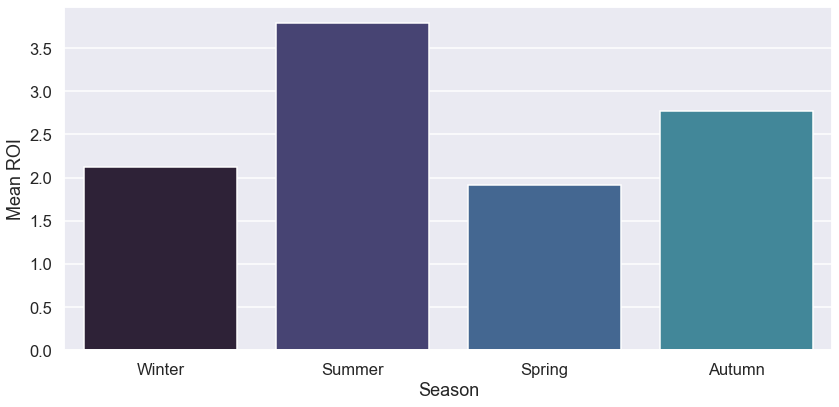

''

In [116]:
#plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'season', y = 'roi', data = month, ci = False)
plt.xlabel('Season')
plt.ylabel('Mean ROI') 

#save fig
plt.savefig('roi_by_season.jpg')

# display
plt.tight_layout()
plt.show()

;

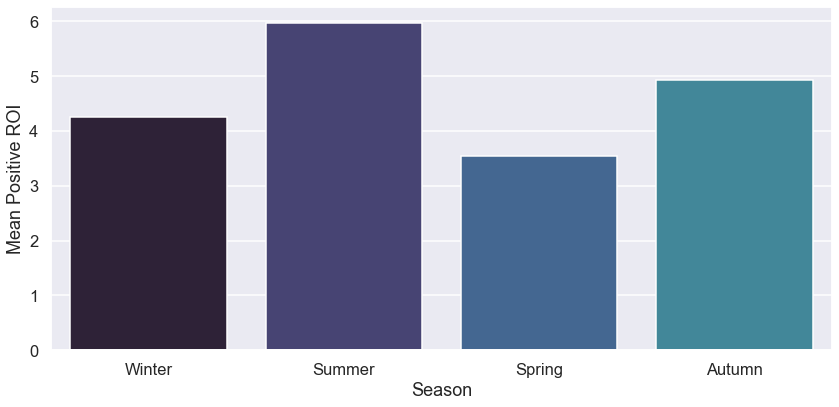

''

In [125]:
# subset positive ROI
pos_roi = month[month['roi'] > 0]

season_ord = ['Winter', 'Summer', 'Spring', 'Autumn']

# Plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'season', y = 'roi', data = pos_roi, ci = False, order = season_ord)
plt.xlabel('Season')
plt.ylabel('Mean Positive ROI') 

#save fig
plt.savefig('roi_by_season_pos.jpg')

# display
plt.tight_layout()
plt.show()

;

## Bayes

In [94]:
seasons = month['season'].unique()
season_data = {season: month['roi'][month['season'] == season] for season in seasons}

# Given probabilities
p_pos_roi = 0.6199664429530202
p_neg_roi = 0.3800335570469799


In [97]:
# prob of each season
total_movies = len(month)
season_counts = month['season'].value_counts()
season_probabilities = season_counts / total_movies

print("Probability of a movie being debuted in each season:")
print(season_probabilities)

Probability of a movie being debuted in each season:
Autumn    0.269715
Winter    0.257970
Summer    0.236577
Spring    0.235738
Name: season, dtype: float64


In [198]:
# P(pos)
p_pos_roi = (month['roi'] > 0).mean()

# P(neg)
p_neg_roi = (month['roi'] < 0).mean()

print("P(Positive ROI):", positive_roi_probability)
print("P(Negative ROI):", negative_roi_probability)

P(Positive ROI): 0.6199664429530202
P(Negative ROI): 0.3800335570469799


In [199]:
# prob 
# conditional prob for season and positive ROI
positive_roi_probabilities = {}
for season in month['season'].unique():
    szn_dat = month[month['season'] == season]
    pos_roi = (szn_dat['roi'] > 0).sum()
    tot_movies = len(szn_dat)
    positive_roi_probabilities[season] = pos_roi / tot_movies

# conditional prob for season and negative ROI
negative_roi_probabilities = {}
for season in month['season'].unique():
    szn_dat = month[month['season'] == season]
    neg_roi = (szn_dat['roi'] < 0).sum()
    total_movies = len(szn_dat)
    negative_roi_probabilities[season] = neg_roi / total_movies_in_season

print("Probability of a positive ROI given each season:")
print(positive_roi_probabilities)

print("\nProbability of a negative ROI given each season:")
print(negative_roi_probabilities)

Probability of a positive ROI given each season:
{'Winter': 0.5756097560975609, 'Summer': 0.6737588652482269, 'Spring': 0.6174377224199288, 'Autumn': 0.6174183514774495}

Probability of a negative ROI given each season:
{'Winter': 0.4059097978227061, 'Summer': 0.28615863141524106, 'Spring': 0.3343701399688958, 'Autumn': 0.38258164852255055}


## Statistical Significance with ANOVA

In [ ]:
#likelihood
likelihoods = {season: stats.norm(loc=season_data[season].mean(),
                                  scale=season_data[season].std()) for season in seasons}

# Define the prior probability of each season (you can adjust these values based on your prior knowledge)
prior_probs = {
    'Winter': 0.25,
    'Summer': 0.25,
    'Spring': 0.25,
    'Autumn': 0.25
}

# posterior
posterior_probs = {}
for season in seasons:
    likelihood = likelihoods[season].pdf(month['roi'])
    num = likelihood * prior_probs[season]
    denom = np.sum([likelihoods[other_season].pdf(month['roi']) * prior_probs[other_season] 
                    for other_season in seasons])
    posterior_probs[season] = num / denom
    print(posterior_probs[season])

# Choose season with highest posterior
#predicted_season = max(posterior_probs, key=lambda k: posterior_probs[k])

#print("Predicted Season:", predicted_season)

In [16]:
roi = month['roi']
month_col = month['month']
szn = month['season']

In [17]:
#anova

categories = [group['roi'] for name, group in month.groupby('season')]
f_stat, pval = stats.f_oneway(*categories)

In [18]:
alpha = 0.05 
print(pval)
if pval < alpha:
    print("statistically significant")
else:
    print("not statistically significant")

0.07687859499455739
not statistically significant


In [19]:
#test for significance in roi and month 

In [20]:
#anova

cat2 = [group['roi'] for name, group in month.groupby('official_month')]
f_stat, pval = stats.f_oneway(*cat2)

In [21]:
alpha = 0.05 
print(pval)
if pval < alpha:
    print("statistically significant")
else:
    print("not statistically significant")

0.25634436177269776
not statistically significant


# Runtime

In [6]:
runtime = df[['title','runtime', 'roi']]

In [7]:
runtime.value_counts()
runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2155
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    2156 non-null   object 
 1   runtime  1812 non-null   float64
 2   roi      2156 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.4+ KB


In [8]:
runtime = runtime.sort_values('runtime')

In [9]:
runtime.head()

,title,runtime,roi
1479,November,1.0,-0.232552
159,Lovesick,4.0,0.004319
1920,Dinosaur,5.0,1.793318
1364,Jumper,5.0,1.698677
1360,Role Models,6.0,2.375029


In [26]:
# short films = 40 min or less
# avg film 41 min to 150 min
# long film > 150

In [11]:
short_count = len(runtime[runtime['runtime'] < 40])
avg_count = len((runtime[(runtime['runtime'] >= 41) & (runtime['runtime'] < 150)]))
long_count = len(runtime[runtime['runtime'] > 151])

print(f'Short movies {short_count} Avg movies {avg_count} Long movies {long_count}')

Short movies 22 Avg movies 1748 Long movies 34


In [12]:
# catogorize runtime into length

def runtime_cat(runtime):
    if 0.0 <= runtime <= 40.0:
        return "Films less than 40 Minutes"
    elif 41.0 <= runtime <= 150.0:
        return "Films between 40 minutes and 150 minutes"
    else:
        return "Films longer than 150 minutes"

In [15]:
# apply and create new column
runtime['runtime_length'] = runtime['runtime'].apply(runtime_cat)

#add 
runtime.isna().sum()

#runtime = runtime.dropna()

title             0
runtime           0
roi               0
runtime_length    0
dtype: int64

In [141]:
runtime.head(20)

,title,runtime,roi,runtime_length
1643,November,1.0,-0.232552,Films less than 40 Minutes
168,Lovesick,4.0,0.004319,Films less than 40 Minutes
1500,Jumper,5.0,1.698677,Films less than 40 Minutes
2127,Dinosaur,5.0,1.793318,Films less than 40 Minutes
1496,Role Models,6.0,2.375029,Films less than 40 Minutes
1699,Elizabeth,7.0,2.286026,Films less than 40 Minutes
2042,American Dreamz,7.0,-0.028766,Films less than 40 Minutes
178,Next,7.0,0.051307,Films less than 40 Minutes
1878,Birth,9.0,-0.269850,Films less than 40 Minutes
1701,Gladiator,9.0,3.443532,Films less than 40 Minutes


''

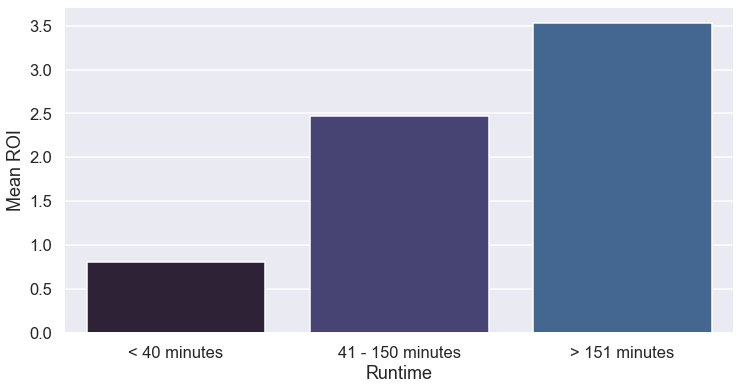

In [139]:

#pos_roi_rt = runtime[runtime['roi'] > 0]

#plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'runtime_length', y = 'roi', data = runtime, ci = False)

plt.xlabel('Runtime')
plt.ylabel('Mean ROI') 

#set x_ticks
custom_labels = ["< 40 minutes", "41 - 150 minutes", "> 151 minutes"]
plt.xticks(range(len(custom_labels)), custom_labels)

#save
plt.savefig('runtime_roi.jpg', dpi=300)
;

''

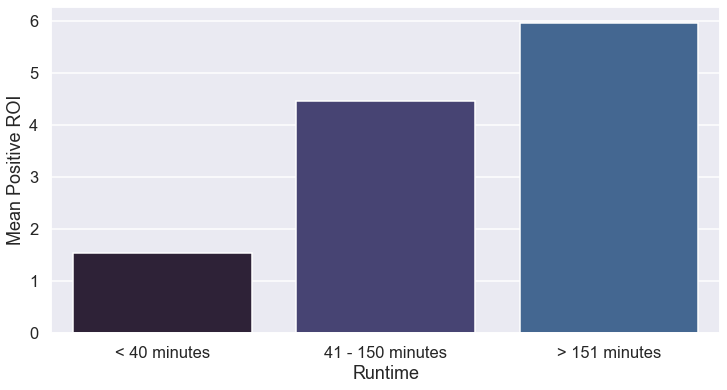

In [140]:

pos_roi_rt = runtime[runtime['roi'] > 0]

#plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'runtime_length', y = 'roi', data = pos_roi_rt, ci = False)

plt.xlabel('Runtime')
plt.ylabel('Mean Positive ROI') 

#set x_ticks
custom_labels = ["< 40 minutes", "41 - 150 minutes", "> 151 minutes"]
plt.xticks(range(len(custom_labels)), custom_labels)

#save
plt.savefig('runtime_pos_roi.jpg', dpi=300)
;

In [ ]:
## Runtime

In [180]:
# Given probabilities
p_pos_roi = 0.6199664429530202
p_neg_roi = 0.3800335570469799


In [191]:
# Count the number of movies in each category
pos_short = len(runtime[(runtime['runtime_length'] == 'Films less than 40 Minutes') & (runtime['roi'] > 0)])
short = len(runtime[runtime['runtime_length'] == 'Films less than 40 Minutes'])
                    
pos_avg = len(runtime[(runtime['runtime_length'] == 'Films between 40 minutes and 150 minutes') & (runtime['roi'] > 0)])
average = len(runtime[runtime['runtime_length'] == 'Films between 40 minutes and 150 minutes'])

pos_long = len(runtime[(runtime['runtime_length'] == 'Films longer than 150 minutes') & (runtime['roi'] > 0)])
long = len(runtime[runtime['runtime_length'] == 'Films longer than 150 minutes'])


# Total number of movies
total_movies = len(runtime)

In [192]:
#P(Pos|Short)
p_given_short = pos_short / short


In [193]:
#P(pos|average)
p_given_avg = pos_avg / average


In [194]:
#P(pos|average)
p_given_long = pos_long / long

In [195]:
print("P(p_positive_roi | p_short):", p_given_short)
print("P(p_positive_roi | p_avg):", p_given_avg)
print("P(p_positive_roi | p_long):", p_given_long)

P(p_positive_roi | p_short): 0.6190476190476191
P(p_positive_roi | p_avg): 0.6160990712074303
P(p_positive_roi | p_long): 0.6376470588235295


## distributions

In [32]:
# by month

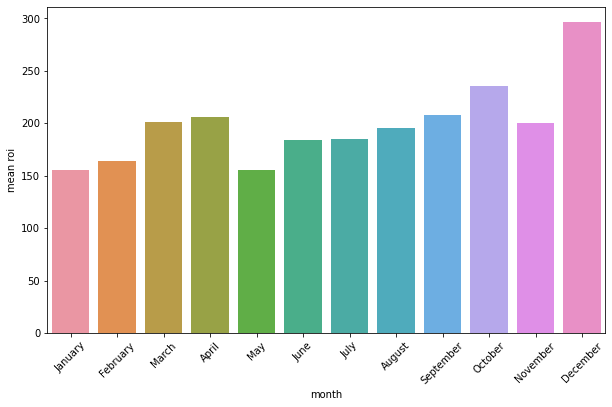

In [33]:
month_counts = month['official_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# plot

plt.figure(figsize=(10, 6))
sns.set_palette("mako")
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xlabel('month')
plt.ylabel('mean roi') 
plt.xticks(rotation=45);

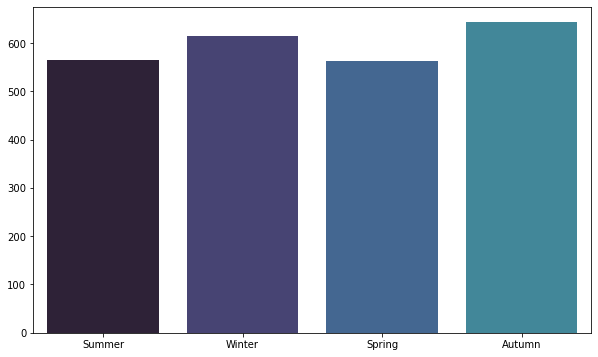

In [34]:
# by season

season_counts = month['season'].value_counts().reindex(
    ['Summer', 'Winter', 'Spring', 'Autumn']
)

# plot
plt.figure(figsize = (10, 6))
sns.set_palette("mako")
sns.barplot(x = season_counts.index, y = season_counts.values);


In [35]:
#short films

In [16]:
short_films = runtime[(runtime['runtime_length'] == 'Short Film')

# plot
plt.figure(figsize=(10, 6))
sns.histplot(data=short_films, x='roi', bins=10, kde=True)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

SyntaxError: invalid syntax (<ipython-input-16-528cb508a269>, line 4)

In [37]:
#find outlier
high_roi_short = short_films[short_films['roi'] > 5]
high_roi_short #twilight mistake?

,title,runtime,roi,runtime_length


''

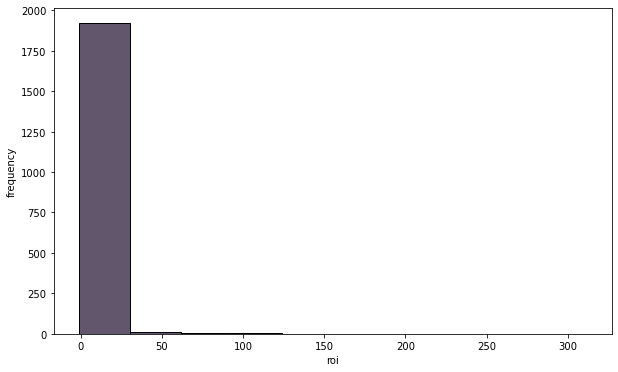

In [38]:
#avg films

avg_films = runtime[runtime['runtime_length'] == 'Average Film']

# plot
plt.figure(figsize = (10, 6))
sns.histplot(data = avg_films, x ='roi', bins = 10)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

In [39]:
#find outlier
high_roi_avg = avg_films[avg_films['roi'] > 50]
high_roi_avg #exceptional movies #maybe we analyze them seperately? is there a commonality?

,title,runtime,roi,runtime_length
2092,Snow White and the Seven Dwarfs,49.0,123.277880,Average Film
1431,Bambi,58.0,311.354312,Average Film
1414,Graduation Day,75.0,94.576000,Average Film
610,The Devil Inside,83.0,100.759490,Average Film
1684,Unfriended,83.0,63.364198,Average Film
895,Benji,87.0,62.119120,Average Film
1429,Split,90.0,54.792961,Average Film
587,Paranormal Activity 2,91.0,58.170677,Average Film
645,Insidious,103.0,65.580591,Average Film
1901,Get Out,104.0,50.073590,Average Film


''

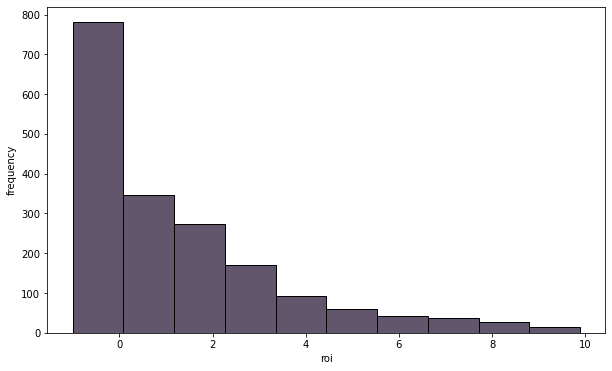

In [40]:
#avg films

avg_films_lower_roi = runtime[(runtime['runtime_length'] == 'Average Film') & (runtime['roi'] < 10)]

# plot
plt.figure(figsize = (10, 6))
sns.histplot(data = avg_films_lower_roi, x ='roi', bins = 10)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

''

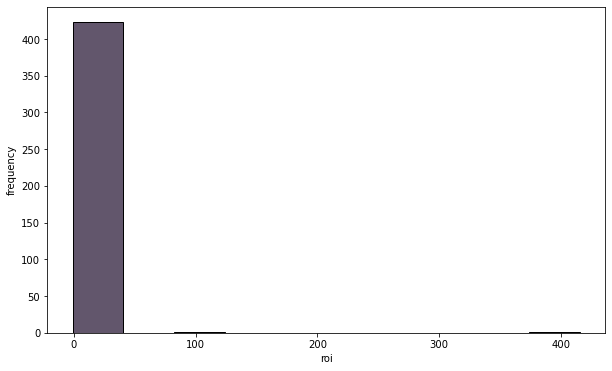

In [41]:
#long films

long_films = runtime[runtime['runtime_length'] == 'Extended Film']

# plot
plt.figure(figsize = (10, 6))
sns.histplot(data = long_films, x ='roi', bins = 10)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

In [42]:
#find outlier
high_roi_long = long_films[long_films['roi'] > 100]
high_roi_long #exceptional movies #maybe we analyze them seperately? is there a commonality?

,title,runtime,roi,runtime_length
2267,The Gallows,NaN,415.56474,Extended Film


In [56]:
#dropna 
long_films = long_films.dropna()
long_films = long_films[long_films['roi'] <= 15]

''

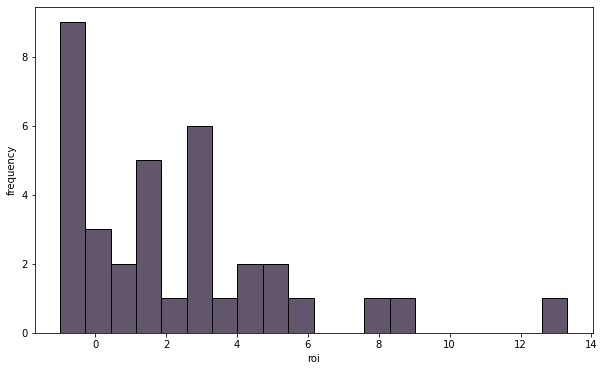

In [80]:
plt.figure(figsize = (10, 6))
sns.histplot(data = long_films, x ='roi', bins = 20)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

In [45]:
#find outlier
high_roi_long = long_films[long_films['roi'] > 25]
high_roi_long #exceptional movies #maybe we analyze them seperately? is there a commonality?

,title,runtime,roi,runtime_length
1095,Maniac,160.0,27.571429,Extended Film
1905,Dangal,161.0,30.016276,Extended Film


## Stats by movie budget

In [46]:
df.head()

,Unnamed: 0,title,runtime,primary_name,studio,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,month,year,roi,genre
0,19,Foodfight!,91.0,Lawrence Kasanoff,NaN,4.705,2.1,46.0,"Dec 31, 2012",45000000.0,73706.0,12.0,2012.0,-0.998362,Comedy Animation Action Family
1,32,Mortal Kombat,NaN,Simon McQuoid,NaN,NaN,NaN,NaN,"Aug 18, 1995",20000000.0,122133227.0,8.0,1995.0,5.106661,Fantasy Adventure Action
2,39,The Overnight,88.0,Jed I. Goodman,NaN,6.576,6.0,200.0,"Jun 19, 2015",200000.0,1165996.0,6.0,2015.0,4.829980,Comedy Mystery
3,49,On the Road,124.0,Walter Salles,IFC,8.919,5.6,518.0,"Mar 22, 2013",25000000.0,9313302.0,3.0,2013.0,-0.627468,Drama Romance Adventure
4,61,The Secret Life of Walter Mitty,114.0,Ben Stiller,Fox,10.743,7.1,4859.0,"Dec 25, 2013",91000000.0,187861183.0,12.0,2013.0,1.064409,Comedy Drama Fantasy Adventure


In [49]:
#subsets
under_ten = df[df['production_budget'] < 10000000]
ten_hundo = df[(df['production_budget'] >= 10000000) & (df['production_budget'] <= 100000000)]
over_hundo = df[df['production_budget'] > 100000000]

In [51]:
# by month 

#under 10 mill
under_ten_month = under_ten[['title', 'roi','month']]
# apply and create new column
under_ten_month['season'] = under_ten_month['month'].apply(season)

#10 to 1000
ten_hundo_month = ten_hundo[['title', 'roi','month']]
# apply and create new column
ten_hundo_month['season'] = ten_hundo_month['month'].apply(season)

#over 100 mill
over_hundo_month = over_hundo[['title', 'roi','month']]
# apply and create new column
over_hundo_month['season'] = over_hundo_month['month'].apply(season)

<ipython-input-51-a24f4a277d7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_ten_month['season'] = under_ten_month['month'].apply(season)
<ipython-input-51-a24f4a277d7c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_hundo_month['season'] = ten_hundo_month['month'].apply(season)
<ipython-input-51-a24f4a277d7c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [52]:
over_hundo_month.head()

,title,roi,month,season
6,Jurassic World,6.669092,6.0,Summer
9,John Carter,0.028284,3.0,Spring
12,The A-Team,0.611283,6.0,Summer
14,Real Steel,1.398912,10.0,Autumn
16,Toy Story 3,4.344398,6.0,Summer


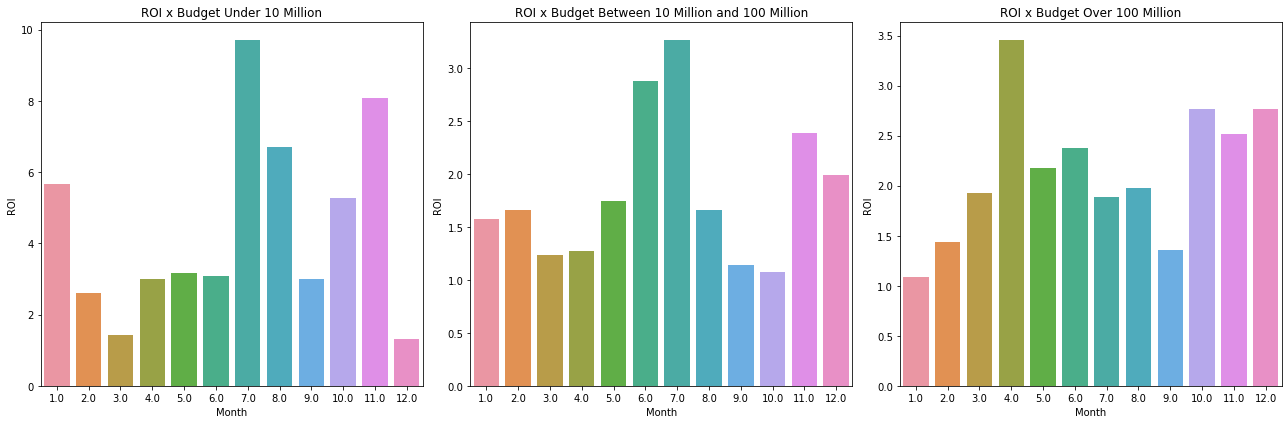

In [53]:
#plot

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#plot 1
sns.barplot(x = 'month', y = 'roi', data = under_ten_month, ci = None, ax = axes[0])
axes[0].set_title('ROI x Budget Under 10 Million')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('ROI')

#plot 2
sns.barplot(x ='month', y ='roi', data = ten_hundo_month, ci=None, ax=axes[1])
axes[1].set_title('ROI x Budget Between 10 Million and 100 Million')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('ROI')

#plot 3
sns.barplot(x = 'month', y ='roi', data = over_hundo_month, ci=None, ax=axes[2])
axes[2].set_title('ROI x Budget Over 100 Million')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('ROI')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

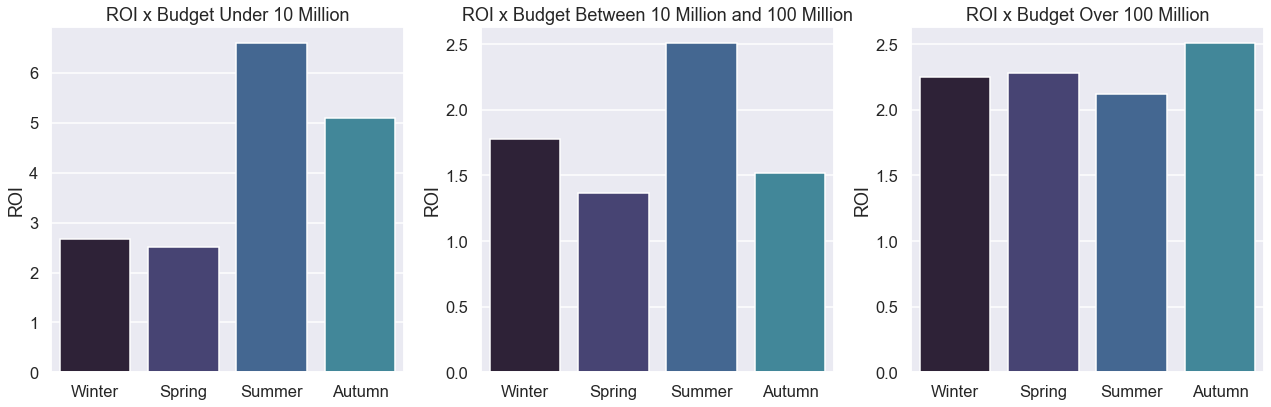

In [120]:
#plot by season

season_ord = ['Winter', 'Spring', 'Summer', 'Autumn']
sns.set_style('darkgrid')
sns.set_context('talk')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#plot 1
sns.barplot(x = 'season', y = 'roi', data = under_ten_month, ci = None, ax = axes[0], order = season_ord)
axes[0].set_title('ROI x Budget Under 10 Million')
axes[0].set_ylabel('ROI')
axes[0].set_xlabel(None)

#plot 2
sns.barplot(x ='season', y ='roi', data = ten_hundo_month, ci=None, ax=axes[1], order = season_ord)
axes[1].set_title('ROI x Budget Between 10 Million and 100 Million')
axes[1].set_ylabel('ROI')
axes[1].set_xlabel(None)

#plot 3
sns.barplot(x = 'season', y ='roi', data = over_hundo_month, ci=None, ax=axes[2], order = season_ord)
axes[2].set_title('ROI x Budget Over 100 Million')
axes[2].set_ylabel('ROI')
axes[2].set_xlabel(None)

#save fig
plt.savefig('roi_by_budget.jpg')

# display
plt.tight_layout()
plt.show()

## Popularity x ROI

In [61]:
df.head()
pop = df[['title', 'popularity', "vote_average", 'vote_count', 'roi']]

In [67]:
#drop rows without pop data
pop = pop[pop['popularity'].notnull()]

pop.head()

,title,popularity,vote_average,vote_count,roi
0,Foodfight!,4.705,2.1,46.0,-0.998362
2,The Overnight,6.576,6.0,200.0,4.829980
3,On the Road,8.919,5.6,518.0,-0.627468
4,The Secret Life of Walter Mitty,10.743,7.1,4859.0,1.064409
5,A Walk Among the Tombstones,19.373,6.3,1685.0,1.218164


In [68]:
#normalize popularity
def normalize_popularity(row):
    vote_average = row['vote_average']
    vote_count = row['vote_count']
    
    # make sure there is no zero 
    if vote_count != 0:
        normalized_popularity = row['popularity'] * (vote_average / vote_count)
    else:
        normalized_popularity = 0  # Set to 0 if vote_count is 0
    
    return normalized_popularity

# apply normalization
pop['normalized_popularity'] = pop.apply(normalize_popularity, axis=1)

In [69]:
pop.head()

,title,popularity,vote_average,vote_count,roi,normalized_popularity
0,Foodfight!,4.705,2.1,46.0,-0.998362,0.214793
2,The Overnight,6.576,6.0,200.0,4.829980,0.197280
3,On the Road,8.919,5.6,518.0,-0.627468,0.096422
4,The Secret Life of Walter Mitty,10.743,7.1,4859.0,1.064409,0.015698
5,A Walk Among the Tombstones,19.373,6.3,1685.0,1.218164,0.072433


In [70]:
# check correlation

corr, pval = stats.pearsonr(pop['roi'], pop['normalized_popularity'])

alpha = 0.05 
print(pval)
if pval < alpha:
    print("statistically significant")
else:
    print("not statistically significant")

0.12146810990383176
not statistically significant


In [74]:
pop = pop[pop['title'] != 'The Gallows']